 # Kqlmagic  - __parametrization__ features
***
Explains how to emebed python values in kql queries
***
***



## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from PyPI and install/update
(if latest version ims already installed you can skip this step)

In [ ]:
#!pip install Kqlmagic --upgrade

## Add Kqlmagic to notebook magics

C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure



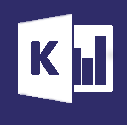

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks
popd -> c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks


In [1]:
%pushd C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure
%reload_ext Kqlmagic
%popd

## Authenticate to get access to data

In [2]:
%kql kusto://code;cluster='help';database='Samples'

<IPython.core.display.Javascript object>

## Use python user namespace as source of parameters
- prefix query with kql let statements to parametrize the query

In [3]:
my_limit = 10
my_not_state = 'TEXAS'

In [4]:
%%kql 
    let _limit_ = my_limit;
    let _not_val_ = my_not_state;
    StormEvents
    | where State != _not_val_
    | summarize count() by State
    | sort by count_ 
    | limit _limit_

State,count_
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750
NORTH CAROLINA,1721


[{'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750},
 {'State': 'NORTH CAROLINA', 'count_': 1721}]

  - ### <span style="color:#82CAFA">*Note - all parameters have to be specified in the let statements*</span>
  - ### <span style="color:#82CAFA">*Note - the following parameter python types are supported: int, float, str, datetime, timedelta, dict, list and tuple*</span>
  - ### <span style="color:#82CAFA">*Note - python type timedelta is converted to timespan*</span>
  - ### <span style="color:#82CAFA">*Note - python type dict, list and tuple are converted to dynamic*</span>
  - ### <span style="color:#82CAFA">*Note - python value None is converted to null*</span>

## Use python dictionary as source of parameters
- set option -params_dict with the name of a python variable that refer to the dictionary
- prefix query with kql let statements to parametrize the query

In [5]:
p_dict = {'p_limit': 20, 'p_not_state': 'IOWA'}

In [6]:
%%kql  -params_dict p_dict 
    let _limit_ = p_limit;
    let _not_val_ = p_not_state;
    StormEvents 
    | where State != _not_val_
    | summarize count() by State
    | sort by count_ 
    | limit _limit_

State,count_
TEXAS,4701
KANSAS,3166
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750
NORTH CAROLINA,1721


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750},
 {'State': 'NORTH CAROLINA', 'count_': 1721},
 {'State': 'OKLAHOMA', 'count_': 1716},
 {'State': 'PENNSYLVANIA', 'count_': 1687},
 {'State': 'COLORADO', 'count_': 1654},
 {'State': 'VIRGINIA', 'count_': 1647},
 {'State': 'MICHIGAN', 'count_': 1637},
 {'State': 'SOUTH DAKOTA', 'count_': 1567},
 {'State': 'KENTUCKY', 'count_': 1391},
 {'State': 'ALABAMA', 'count_': 1315},
 {'State': 'OHIO', 'count_': 1233},
 {'State': 'MONTANA', 'count_': 1230}]

## get query string
- shows the original query, as in the input cell

In [7]:
_kql_raw_result_.query

'let _limit_ = p_limit;\n    let _not_val_ = p_not_state;\n    StormEvents \n    | where State != _not_val_\n    | summarize count() by State\n    | sort by count_ \n    | limit _limit_'

## get parametrized query string
- shows the parametrized query, that was submited to kusto

In [8]:
_kql_raw_result_.parametrized_query

"let p_limit = 20;let p_not_state = 'IOWA';let _limit_ = p_limit;\n    let _not_val_ = p_not_state;\n    StormEvents \n    | where State != _not_val_\n    | summarize count() by State\n    | sort by count_ \n    | limit _limit_"

  - ### <span style="color:#82CAFA">*Note - additional let statements were added to the original query, one let statement for each parameter*</span>

## parameters dictionary is modified

In [9]:
p_dict = {'p_limit': 5, 'p_not_state': 'IOWA'}

## refresh use original parameters
- the same parameter values are used

In [10]:
_kql_raw_result_.refresh()

State,count_
TEXAS,4701
KANSAS,3166
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750
NORTH CAROLINA,1721


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750},
 {'State': 'NORTH CAROLINA', 'count_': 1721},
 {'State': 'OKLAHOMA', 'count_': 1716},
 {'State': 'PENNSYLVANIA', 'count_': 1687},
 {'State': 'COLORADO', 'count_': 1654},
 {'State': 'VIRGINIA', 'count_': 1647},
 {'State': 'MICHIGAN', 'count_': 1637},
 {'State': 'SOUTH DAKOTA', 'count_': 1567},
 {'State': 'KENTUCKY', 'count_': 1391},
 {'State': 'ALABAMA', 'count_': 1315},
 {'State': 'OHIO', 'count_': 1233},
 {'State': 'MONTANA', 'count_': 1230}]

  - ### <span style="color:#82CAFA">*Note - the refresh method use the original parameter values, as they were set*</span>

## submit use the current python values as parameters
- a new query is created and parametrized with the current python values

In [11]:
_kql_raw_result_.submit()

State,count_
TEXAS,4701
KANSAS,3166
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983}]

  - ### <span style="color:#82CAFA">*Note - the submit method cretes a new query and parametrize with the current parameter values*</span>